In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [30]:
df = pd.read_csv('Carbon Emission.csv')

In [31]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [32]:
df.columns = ['Body Type', 'Sex', 'Diet', 'Shower', 'Heating', 'Transport', 'Vehicle type', 'Social Activity', 'Monthly Grocery Bill', 'Flight', 'Vehicle Distance', 
              'Waste Bag Size', 'Waste Weekly', 'TV Daily Hour', 'Clothes Monthly', 'Internet Daily', 'Energy Efficiency', 'Recycling', 'Cooking', 
              'Carbon Emission']

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [33]:
df.isnull().sum()

body_type                  0
sex                        0
diet                       0
shower                     0
heating                    0
transport                  0
vehicle_type            6721
social_activity            0
monthly_grocery_bill       0
flight                     0
vehicle_distance           0
waste_bag_size             0
waste_weekly               0
tv_daily_hour              0
clothes_monthly            0
internet_daily             0
energy_efficiency          0
recycling                  0
cooking                    0
carbon_emission            0
dtype: int64

In [34]:
df.replace(np.nan, 'None', inplace=True)

In [35]:
df.dtypes

body_type               object
sex                     object
diet                    object
shower                  object
heating                 object
transport               object
vehicle_type            object
social_activity         object
monthly_grocery_bill     int64
flight                  object
vehicle_distance         int64
waste_bag_size          object
waste_weekly             int64
tv_daily_hour            int64
clothes_monthly          int64
internet_daily           int64
energy_efficiency       object
recycling               object
cooking                 object
carbon_emission          int64
dtype: object

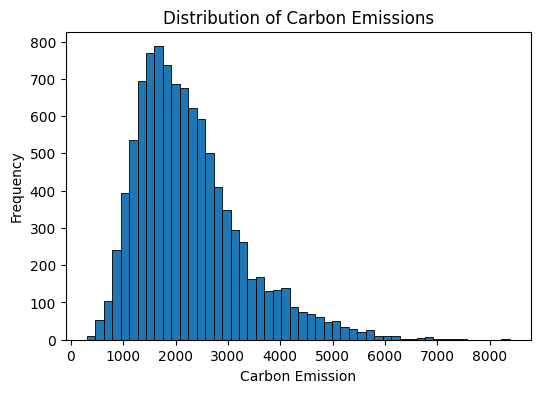

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df.carbon_emission[df.carbon_emission < 10000], bins=50, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Carbon Emission')
plt.title('Distribution of Carbon Emissions')

plt.show()

In [40]:
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

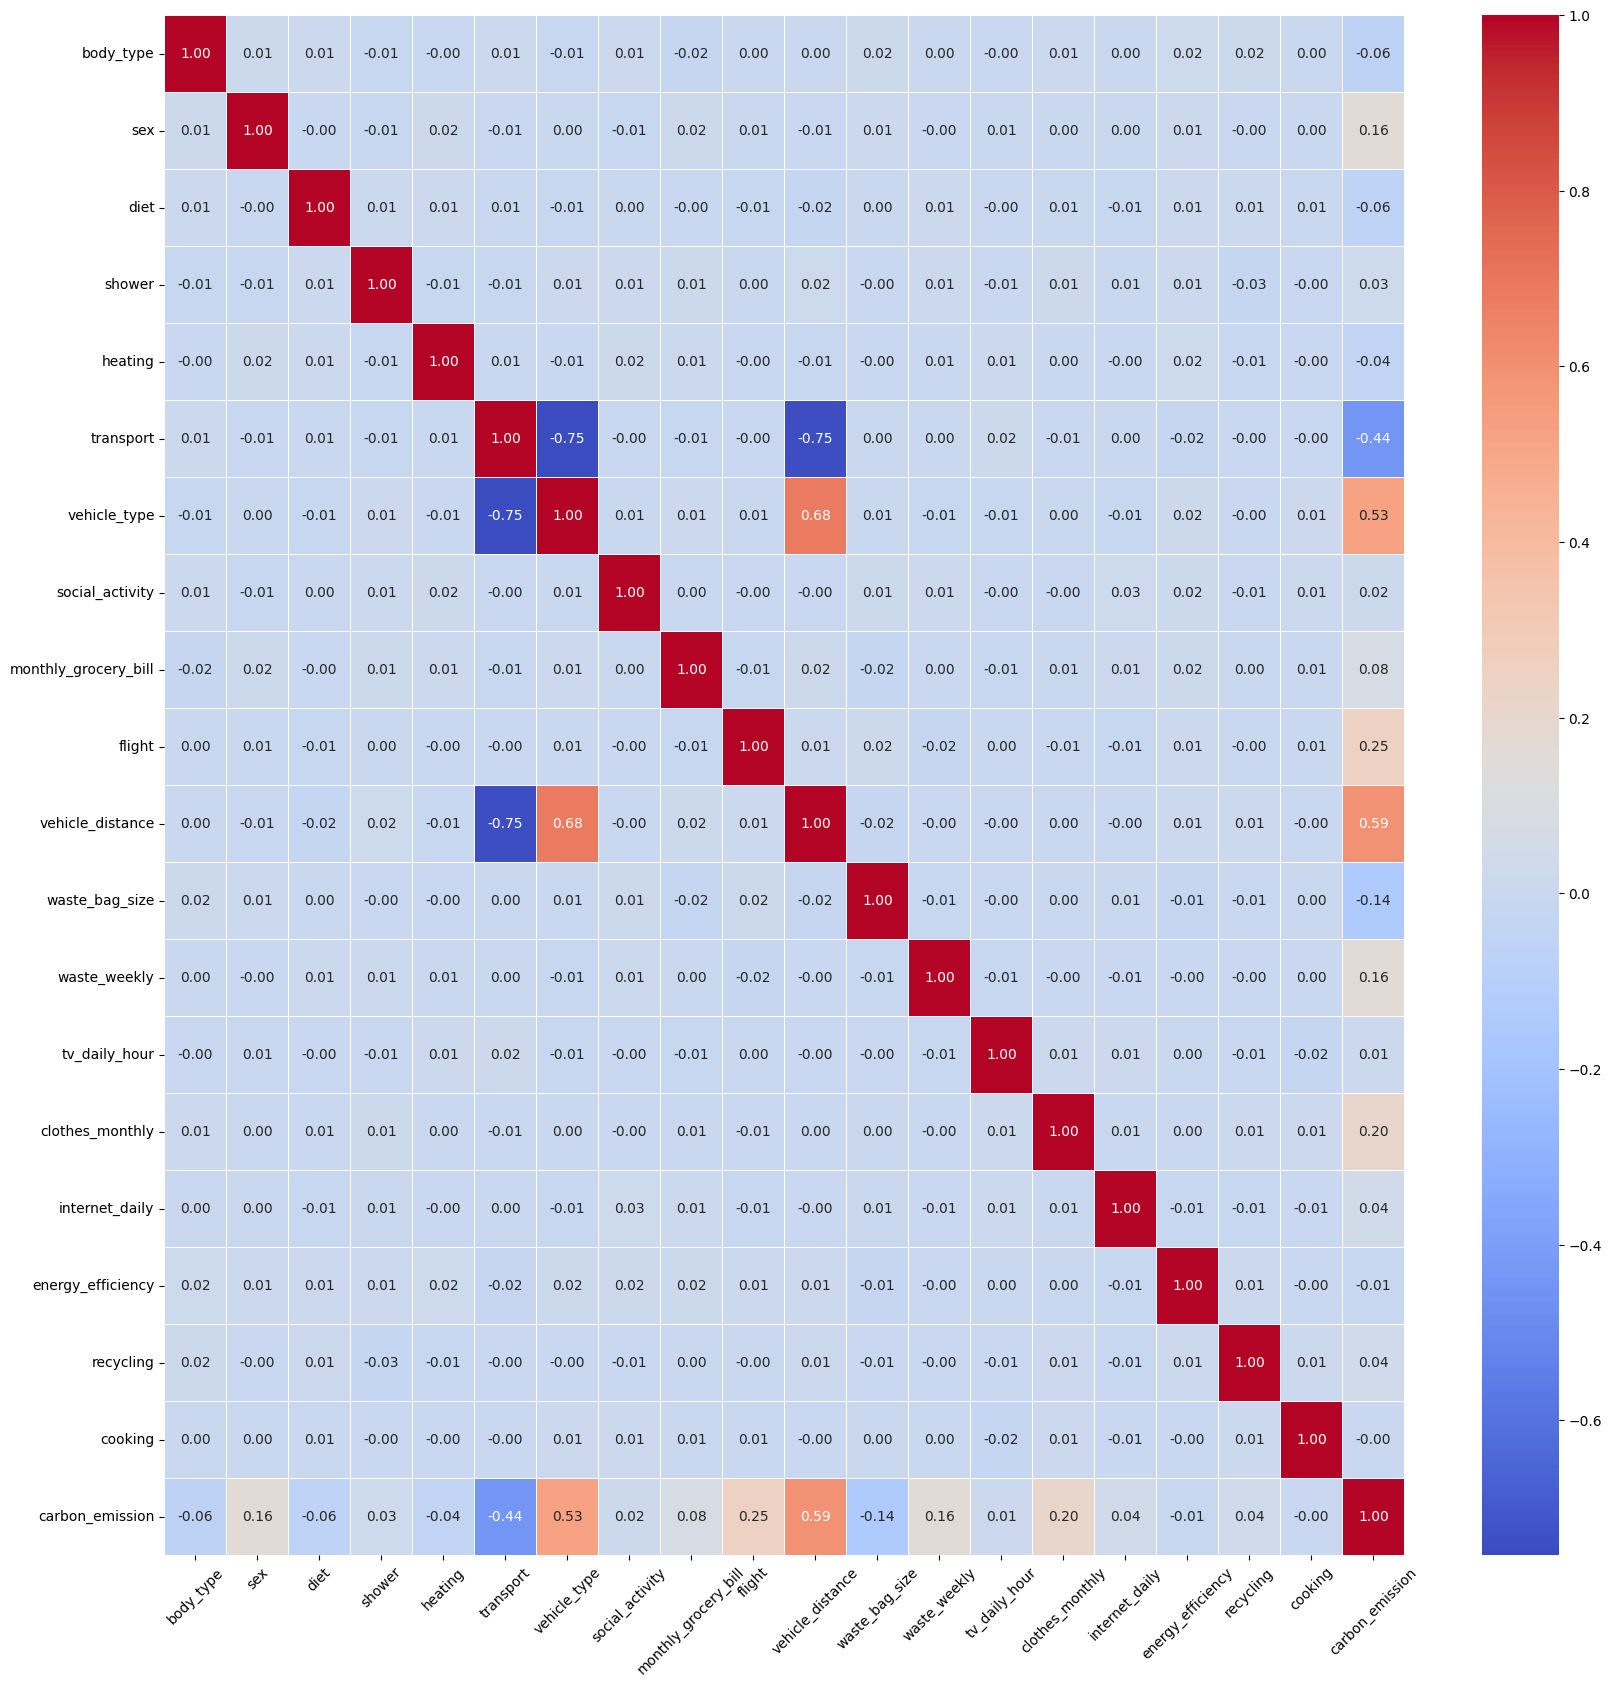

In [41]:
df_corr = df.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [42]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.carbon_emission.values
y_val = df_val.carbon_emission.values
y_test = df_test.carbon_emission.values

In [45]:
del df_train['carbon_emission']
del df_val['carbon_emission']   
del df_test['carbon_emission']

In [46]:
dv = DictVectorizer(sparse=True)

In [47]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)

In [55]:
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse}')

r2 = r2_score(y_val, y_pred)
print(f'R-squared: {r2}')

MSE: 436010.0588102523
R-squared: 0.5724918499957266


In [66]:
model = DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [69]:
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse}')

r2 = r2_score(y_val, y_pred)
print(f'R-squared: {r2}')

MSE: 197260.66638302023
R-squared: 0.8065857866120583
